In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate


# 1. Defining the problem statement
Look at each variable and do a philosophical analysis about their meaning and importance for this problem.

# 2. Collecting Data

In [2]:
dataset = pd.read_csv("train.csv")
df =dataset.copy()

In [3]:
test = pd.read_csv('test.csv')
sub_df = pd.read_csv('sample_submission.csv')

# 3. EDA(Exploratory Data Analysis) & Data Preprocessing


In [4]:
#train
dataset.shape
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#test
test.shape
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Missing_Value 

In [6]:
#train
nan_dict = {"CNT":dataset.isna().sum(),
            "RATE": dataset.isna().sum()/dataset.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

               CNT       RATE
PoolQC        1453  99.520548
MiscFeature   1406  96.301370
Alley         1369  93.767123
Fence         1179  80.753425
FireplaceQu    690  47.260274
LotFrontage    259  17.739726
GarageType      81   5.547945
GarageYrBlt     81   5.547945
GarageFinish    81   5.547945
GarageQual      81   5.547945
GarageCond      81   5.547945
BsmtExposure    38   2.602740
BsmtFinType2    38   2.602740
BsmtFinType1    37   2.534247
BsmtCond        37   2.534247
BsmtQual        37   2.534247
MasVnrArea       8   0.547945
MasVnrType       8   0.547945
Electrical       1   0.068493


(19, 2)

In [7]:
#test
nan_dict = {"CNT":test.isna().sum(),
            "RATE": test.isna().sum()/dataset.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

               CNT       RATE
PoolQC        1456  99.726027
MiscFeature   1408  96.438356
Alley         1352  92.602740
Fence         1169  80.068493
FireplaceQu    730  50.000000
LotFrontage    227  15.547945
GarageCond      78   5.342466
GarageYrBlt     78   5.342466
GarageQual      78   5.342466
GarageFinish    78   5.342466
GarageType      76   5.205479
BsmtCond        45   3.082192
BsmtExposure    44   3.013699
BsmtQual        44   3.013699
BsmtFinType1    42   2.876712
BsmtFinType2    42   2.876712
MasVnrType      16   1.095890
MasVnrArea      15   1.027397
MSZoning         4   0.273973
BsmtFullBath     2   0.136986
BsmtHalfBath     2   0.136986
Functional       2   0.136986
Utilities        2   0.136986
GarageCars       1   0.068493
GarageArea       1   0.068493
TotalBsmtSF      1   0.068493
KitchenQual      1   0.068493
BsmtUnfSF        1   0.068493
BsmtFinSF2       1   0.068493
BsmtFinSF1       1   0.068493
Exterior2nd      1   0.068493
Exterior1st      1   0.068493
SaleType  

(33, 2)

### category variables which use NA as a type  
<pre>
Alley
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmyFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
</pre>



In [8]:
Not_NA=['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType',
'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
len(Not_NA)

14

In [9]:
for i in Not_NA:
    print(i,df[i].unique())
    print(i,test[i].unique())
    print("--"*20)


Alley [nan 'Grvl' 'Pave']
Alley [nan 'Pave' 'Grvl']
----------------------------------------
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtQual ['TA' 'Gd' 'Ex' 'Fa' nan]
----------------------------------------
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtCond ['TA' 'Po' 'Fa' 'Gd' nan]
----------------------------------------
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
----------------------------------------
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType1 ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
----------------------------------------
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType2 ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]
----------------------------------------
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
FireplaceQu [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
----------------------------------------
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageType ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 

In [10]:
for i in range(len(Not_NA)):
    df[Not_NA[i]].fillna("None", inplace= True)
    test[Not_NA[i]].fillna("None", inplace= True)

In [11]:
#남은 결측치 확인
nan_dict = {"CNT":df.isna().sum(),
            "RATE": df.isna().sum()/dataset.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

# LotFrontage: Linear feet of street connected to property float
# GarageYrBlt: Year garage was built
# MasVnrType: Masonry veneer type 건물 외벽 object
# MasVnrArea: Masonry veneer area in square feet float
# Electrical: Electrical system object

             CNT       RATE
LotFrontage  259  17.739726
GarageYrBlt   81   5.547945
MasVnrType     8   0.547945
MasVnrArea     8   0.547945
Electrical     1   0.068493


(5, 2)

In [12]:
train_NA = list(nan_df[nan_df["RATE"]>0].index)

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train_NA.remove('LotFrontage')

for i in train_NA:
    df[i].fillna(df[i].mode()[0], inplace= True)

In [14]:
#test 남은 결측치 확인
nan_dict = {"CNT":test.isna().sum(),
            "RATE": test.isna().sum()/dataset.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

              CNT       RATE
LotFrontage   227  15.547945
GarageYrBlt    78   5.342466
MasVnrType     16   1.095890
MasVnrArea     15   1.027397
MSZoning        4   0.273973
BsmtHalfBath    2   0.136986
Utilities       2   0.136986
Functional      2   0.136986
BsmtFullBath    2   0.136986
GarageArea      1   0.068493
GarageCars      1   0.068493
KitchenQual     1   0.068493
BsmtUnfSF       1   0.068493
TotalBsmtSF     1   0.068493
BsmtFinSF2      1   0.068493
BsmtFinSF1      1   0.068493
Exterior2nd     1   0.068493
Exterior1st     1   0.068493
SaleType        1   0.068493


(19, 2)

In [15]:
test_NA = list(nan_df[nan_df["RATE"]>0].index)

test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_NA.remove('LotFrontage')

for i in test_NA:
    test[i].fillna(test[i].mode()[0], inplace= True)

## Unique Id 변수 삭제

In [16]:
test.drop("Id", axis=1, inplace = True)
df.drop("Id", axis=1, inplace = True)

## Scaling

In [17]:
df_X =df.drop("SalePrice", axis=1)
print(df_X.shape, test.shape)

train_test = pd.concat([df_X,test], axis = 0)
y_df =df["SalePrice"]

(1460, 79) (1459, 79)


In [18]:
#log transform skewed numeric features:
from scipy.stats import skew
numeric_feats = train_test.dtypes[train_test.dtypes != "object"].index
skewed_feats =  train_test[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats =skewed_feats.index

train_test[skewed_feats] = np.log1p(train_test[skewed_feats])
#y값 스케일링
y_df  = np.log1p(y_df)


In [20]:
# #Test
# #log transform skewed numeric features:


# from scipy.stats import skew
# numeric_feats = test.dtypes[test.dtypes != "object"].index
# skewed_feats =  test[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats =skewed_feats.index

# test[skewed_feats] = np.log1p(test[skewed_feats])


In [21]:
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal


In [22]:
train_test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,5.081404,RM,3.091042,7.568896,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,6,2006,WD,Normal
1455,5.081404,RM,3.091042,7.546974,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,4,2006,WD,Abnorml
1456,3.044522,RL,5.081404,9.903538,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,9,2006,WD,Abnorml
1457,4.454347,RL,4.143135,9.253591,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,Shed,6.552508,7,2006,WD,Normal
1458,4.110874,RL,4.317488,9.172431,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,11,2006,WD,Normal


## 상관분석

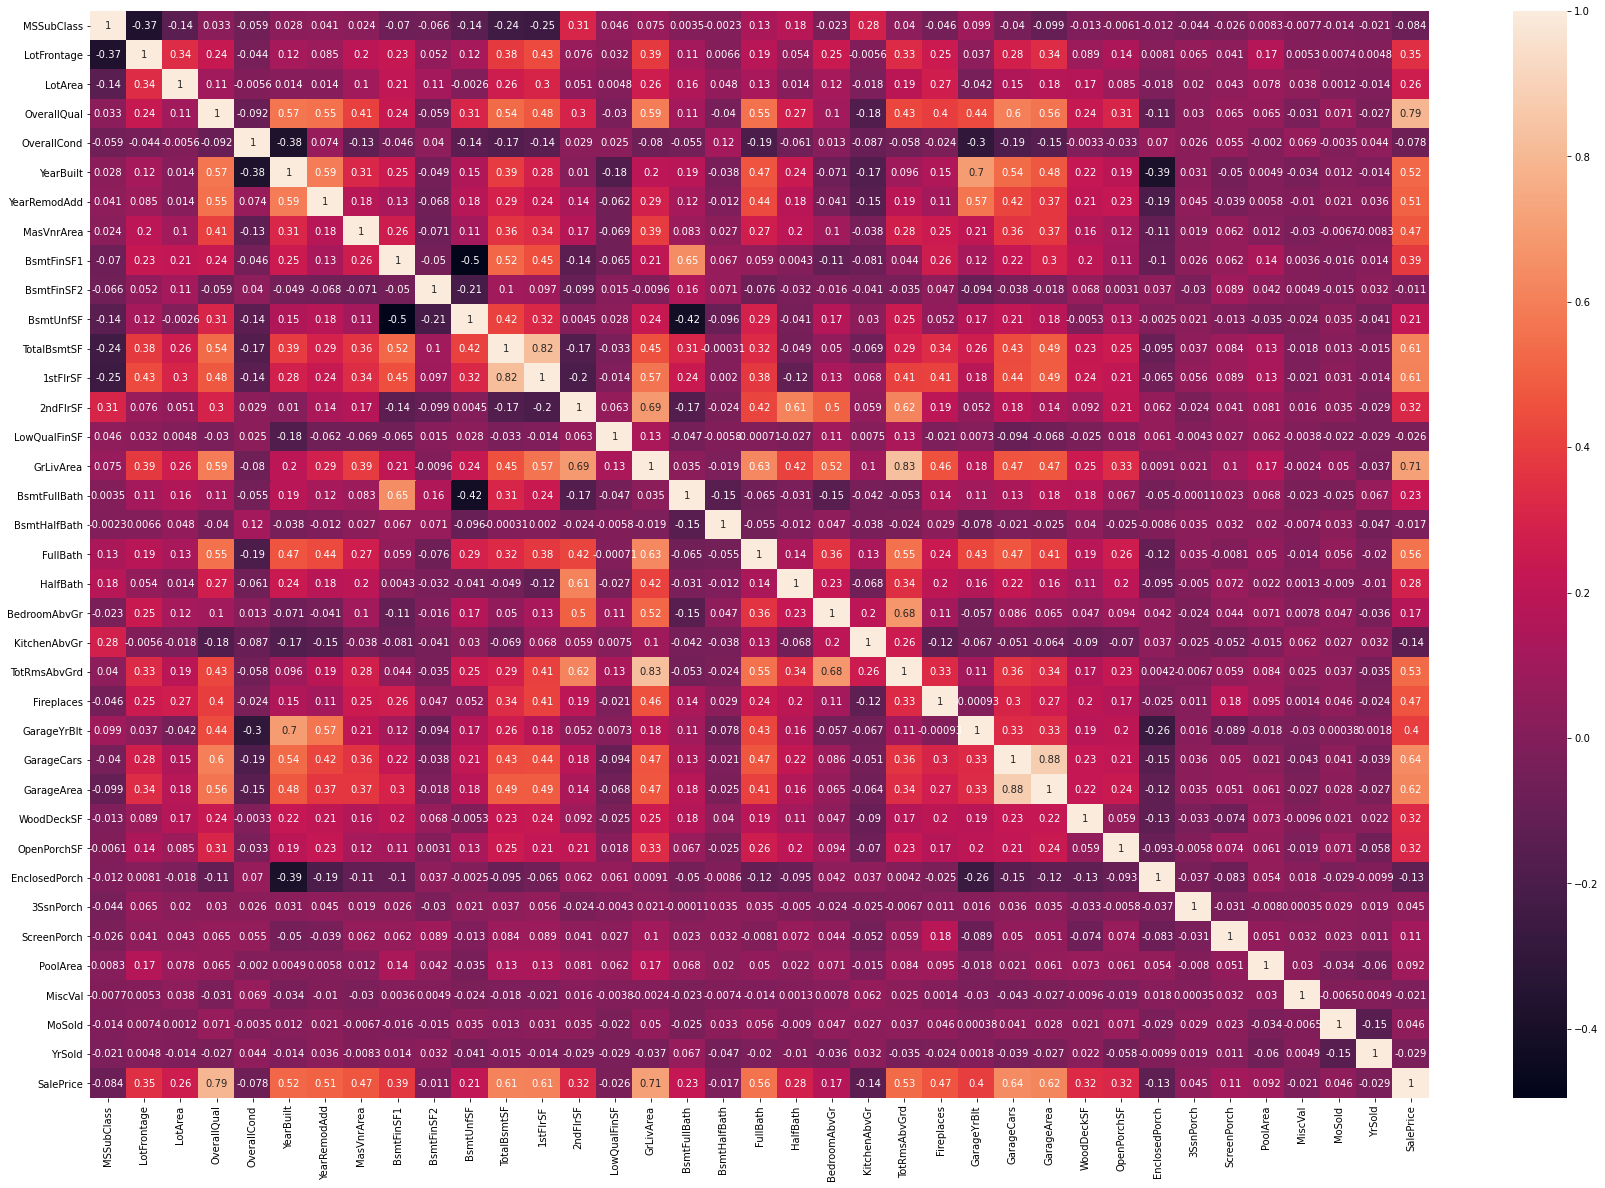

In [20]:
number_col= train_test.dtypes[train_test.dtypes != "object"].index 
train_test_number = pd.concat([train_test[:1460][number_col], y_df], axis=1)

plt.figure(figsize= (30,20))
sns.heatmap(train_test_number.corr(), annot= True, fmt = "0.2g")
plt.show()

In [21]:
X_df = train_test_number.iloc[:,:-1]

X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle = True,random_state=121)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

model1 = LinearRegression()
model1.fit(X_train,y_train)
pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared = True) #MSE
rmse = mean_squared_error(y_val, pred, squared = False) #RMSE

print(f'MSE:{mse:.5f} RMSE {rmse:.5f}')


(1168, 36) (292, 36) (1168,) (292,)
MSE:877291290.68842 RMSE 29619.10348


In [22]:
corr_df =pd.DataFrame(train_test_number.corr(), index= train_test_number.columns)
for i in range(len(number_col)):
    print(abs(corr_df).nlargest(10, number_col[i]).iloc[1:,i])
    print("-"*30)

# corr > 0.5인 조합
corr05 = [('2ndFlrSF', 'MSSubClass'),
('LotArea' ,'LotFrontage'),
('GrLivArea' ,'OverallQual'), ('GarageCars', 'OverallQual'),('YearBuilt','OverallQual'),('GarageArea', 'OverallQual'),('YearRemodAdd','OverallQual'),('FullBath' ,'OverallQual'),
('GarageYrBlt','YearBuilt'),('YearRemodAdd','YearBuilt'),('GarageCars', 'YearBuilt'),
('GarageYrBlt',  'YearRemodAdd'),
('BsmtFullBath' , 'BsmtFinSF1'),
('TotalBsmtSF','BsmtUnfSF'),
('GrLivArea' ,'1stFlrSF'),
('HalfBath','2ndFlrSF'),('GrLivArea' ,'2ndFlrSF'),('TotRmsAbvGrd' ,'2ndFlrSF'),
('TotRmsAbvGrd' ,'GrLivArea'),('FullBath', 'GrLivArea'),('BedroomAbvGr','GrLivArea'),
('TotRmsAbvGrd' ,'FullBath'),
('TotRmsAbvGrd' ,'BedroomAbvGr'),
('GarageArea' ,'GarageCars')]

LotFrontage     0.370367
2ndFlrSF        0.307886
KitchenAbvGr    0.281721
1stFlrSF        0.251758
TotalBsmtSF     0.238518
HalfBath        0.177354
BsmtUnfSF       0.140759
LotArea         0.139781
FullBath        0.131608
Name: MSSubClass, dtype: float64
------------------------------
1stFlrSF        0.434109
GrLivArea       0.385190
TotalBsmtSF     0.381038
MSSubClass      0.370367
SalePrice       0.349876
GarageArea      0.339085
LotArea         0.335957
TotRmsAbvGrd    0.332619
GarageCars      0.281393
Name: LotFrontage, dtype: float64
------------------------------
LotFrontage     0.335957
1stFlrSF        0.299475
Fireplaces      0.271364
SalePrice       0.263843
GrLivArea       0.263116
TotalBsmtSF     0.260833
BsmtFinSF1      0.214103
TotRmsAbvGrd    0.190015
GarageArea      0.180403
Name: LotArea, dtype: float64
------------------------------
SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodA

In [24]:
y_corr = train_test_number.corrwith(y_df)
coef_df = pd.DataFrame(model1.coef_, index = X_df.columns, columns =["coef"])

coef_df["corr"] = y_corr
coef_df.sort_values(by="coef", ascending = False)
# coef_df[(coef_df["corr"] >0.4 )| (coef_df["corr"] < -0.4)]


,coef,corr
GrLivArea,0.426293,0.730254
OverallQual,0.081588,0.817185
LotArea,0.078400,0.399923
GarageCars,0.057356,0.680625
TotRmsAbvGrd,0.057208,0.539998
OverallCond,0.052466,-0.036868
BsmtFullBath,0.041907,0.236224
1stFlrSF,0.040231,0.608955
FullBath,0.037716,0.594771
Fireplaces,0.033521,0.489450


In [42]:
numeric_primary= ['KitchenAbvGr','GrLivArea'	,'OverallQual',	'LotArea','GarageCars','OverallCond']#'BsmtFullBath',	'Fireplaces']	
final_train_test = train_test[numeric_primary]
final_train_test


,KitchenAbvGr,GrLivArea,OverallQual,LotArea,GarageCars,OverallCond
0,0.693147,7.444833,7,9.042040,2.0,5
1,0.693147,7.141245,6,9.169623,2.0,8
2,0.693147,7.488294,7,9.328212,2.0,5
3,0.693147,7.448916,7,9.164401,3.0,5
4,0.693147,7.695758,8,9.565284,3.0,5
...,...,...,...,...,...,...
1454,0.693147,6.996681,4,7.568896,0.0,7
1455,0.693147,6.996681,4,7.546974,1.0,5
1456,0.693147,7.110696,5,9.903538,2.0,7
1457,0.693147,6.878326,5,9.253591,0.0,5


## box_plot

In [26]:
object_col= train_test.dtypes[train_test.dtypes == object].index 
object_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

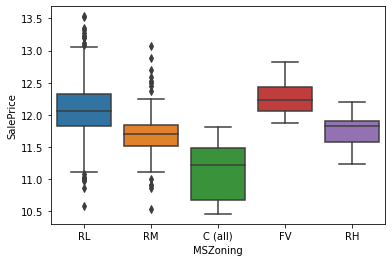

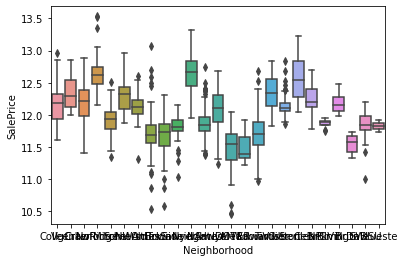

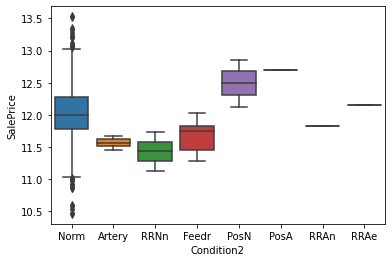

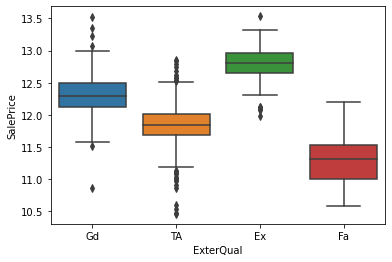

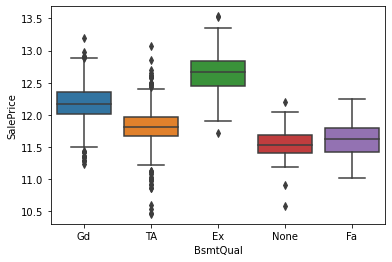

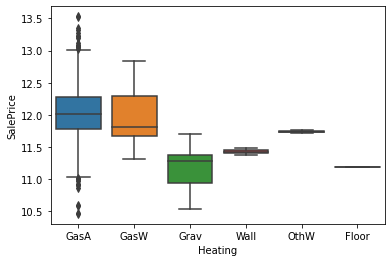

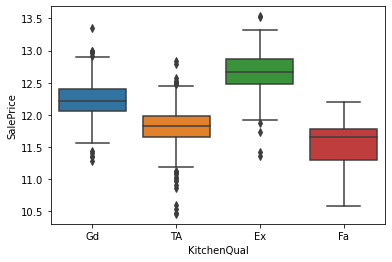

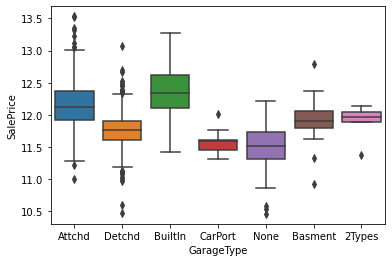

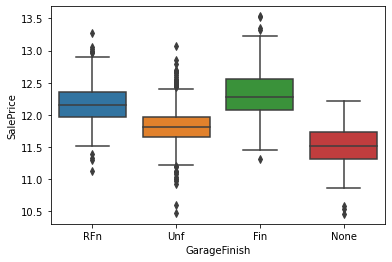

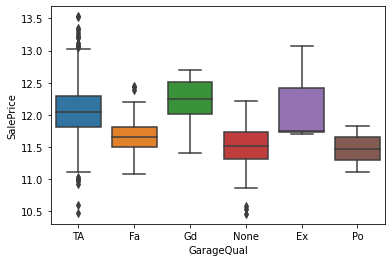

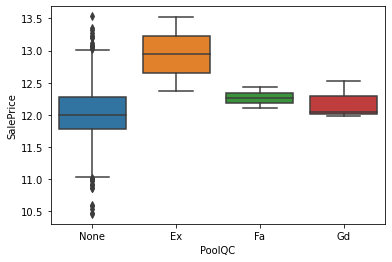

In [27]:
df_copy = train_test[:1460]
train = pd.concat([df_copy,y_df], axis=1)
# train_test.boxplot(column = object_col[0], by= train_test[object_col[0]])
obj_primary = ['MSZoning','Neighborhood','Condition2','ExterQual','BsmtQual','Heating','KitchenQual','GarageType','GarageFinish','GarageQual','PoolQC']

for i in obj_primary:
    plt.figure()
    ax = sns.boxplot(x=i, y= "SalePrice", data = train)

In [43]:
final_train_test= pd.concat([final_train_test,train_test[obj_primary]],axis=1)
final_train_test

,KitchenAbvGr,GrLivArea,OverallQual,LotArea,GarageCars,OverallCond,MSZoning,Neighborhood,Condition2,ExterQual,BsmtQual,Heating,KitchenQual,GarageType,GarageFinish,GarageQual,PoolQC
0,0.693147,7.444833,7,9.042040,2.0,5,RL,CollgCr,Norm,Gd,Gd,GasA,Gd,Attchd,RFn,TA,None
1,0.693147,7.141245,6,9.169623,2.0,8,RL,Veenker,Norm,TA,Gd,GasA,TA,Attchd,RFn,TA,None
2,0.693147,7.488294,7,9.328212,2.0,5,RL,CollgCr,Norm,Gd,Gd,GasA,Gd,Attchd,RFn,TA,None
3,0.693147,7.448916,7,9.164401,3.0,5,RL,Crawfor,Norm,TA,TA,GasA,Gd,Detchd,Unf,TA,None
4,0.693147,7.695758,8,9.565284,3.0,5,RL,NoRidge,Norm,Gd,Gd,GasA,Gd,Attchd,RFn,TA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.693147,6.996681,4,7.568896,0.0,7,RM,MeadowV,Norm,TA,TA,GasA,TA,None,None,None,None
1455,0.693147,6.996681,4,7.546974,1.0,5,RM,MeadowV,Norm,TA,TA,GasA,TA,CarPort,Unf,TA,None
1456,0.693147,7.110696,5,9.903538,2.0,7,RL,Mitchel,Norm,TA,TA,GasA,TA,Detchd,Unf,TA,None
1457,0.693147,6.878326,5,9.253591,0.0,5,RL,Mitchel,Norm,TA,Gd,GasA,TA,None,None,None,None


## Encoding

### get_dummies

In [46]:
#get_dummies 인코딩

#train
for i in range(len(obj_primary)):
    dummy_df = pd.get_dummies(final_train_test[obj_primary[i]])
    final_train_test = pd.concat([final_train_test,dummy_df], axis =1)    

In [47]:
final_train_test

,KitchenAbvGr,GrLivArea,OverallQual,LotArea,GarageCars,OverallCond,MSZoning,Neighborhood,Condition2,ExterQual,...,Ex,Fa,Gd,None,Po,TA,Ex,Fa,Gd,None
0,0.693147,7.444833,7,9.042040,2.0,5,RL,CollgCr,Norm,Gd,...,0,0,0,0,0,1,0,0,0,1
1,0.693147,7.141245,6,9.169623,2.0,8,RL,Veenker,Norm,TA,...,0,0,0,0,0,1,0,0,0,1
2,0.693147,7.488294,7,9.328212,2.0,5,RL,CollgCr,Norm,Gd,...,0,0,0,0,0,1,0,0,0,1
3,0.693147,7.448916,7,9.164401,3.0,5,RL,Crawfor,Norm,TA,...,0,0,0,0,0,1,0,0,0,1
4,0.693147,7.695758,8,9.565284,3.0,5,RL,NoRidge,Norm,Gd,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.693147,6.996681,4,7.568896,0.0,7,RM,MeadowV,Norm,TA,...,0,0,0,1,0,0,0,0,0,1
1455,0.693147,6.996681,4,7.546974,1.0,5,RM,MeadowV,Norm,TA,...,0,0,0,0,0,1,0,0,0,1
1456,0.693147,7.110696,5,9.903538,2.0,7,RL,Mitchel,Norm,TA,...,0,0,0,0,0,1,0,0,0,1
1457,0.693147,6.878326,5,9.253591,0.0,5,RL,Mitchel,Norm,TA,...,0,0,0,1,0,0,0,0,0,1


In [48]:
#기존 컬럼 삭제
final_train_test.drop(obj_primary, axis = 1, inplace= True)


#남은 object type 있는지 확인
print(final_train_test.dtypes[final_train_test.dtypes == object])


df_copy = final_train_test[:1460]
test_copy = final_train_test[1460:]

Series([], dtype: object)


In [59]:
final_train_test

,KitchenAbvGr,GrLivArea,OverallQual,LotArea,GarageCars,OverallCond,C (all),FV,RH,RL,...,Ex,Fa,Gd,None,Po,TA,Ex,Fa,Gd,None
0,0.693147,7.444833,7,9.042040,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0.693147,7.141245,6,9.169623,2.0,8,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0.693147,7.488294,7,9.328212,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0.693147,7.448916,7,9.164401,3.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.693147,7.695758,8,9.565284,3.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.693147,6.996681,4,7.568896,0.0,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1455,0.693147,6.996681,4,7.546974,1.0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1456,0.693147,7.110696,5,9.903538,2.0,7,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1457,0.693147,6.878326,5,9.253591,0.0,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [58]:
X_df = df_copy
# y_df = df["SalePrice"]

X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle = True,random_state=121)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

model1 = LinearRegression()
model1.fit(X_train,y_train)

pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared = True) #MSE
rmse = mean_squared_error(y_val, pred, squared = False) #RMSE

print(f'MSE:{mse:.5f} RMSE {rmse:.5f}')

#dummy
#MSE:183766087910688064.00000 RMSE 428679469.89643 처음
#MSE:728536469.52603 RMSE 26991.41474 Id 제거
#MSE:969745875.68496 RMSE 31140.74302 scale 후에
#MSE:908127775.78686 RMSE 30135.15847 scale 후에

#-----------------------------------------------------------
#Label
# MSE:827344230.24246 RMSE 28763.59210 처음
# MSE:954940616.83012 RMSE 30902.11347 스케일 후
# MSE:1593369743.02272 RMSE 39917.03575 pca 후

#------------------------------------------------
# MSE:663442393.45809 RMSE 25757.37552 전부 get dummy
# MSE:663597195.28582 RMSE 25760.38034 Id제거

#--------------------------------------------------
# MSE:0.01360 RMSE 0.11663 scale 수정 후
# MSE:0.01362 RMSE 0.11670 




(1168, 84) (292, 84) (1168,) (292,)
MSE:37086238256832640.00000 RMSE 192577875.82387


In [57]:
X_val

,KitchenAbvGr,GrLivArea,OverallQual,LotArea,GarageCars,OverallCond,C (all),FV,RH,RL,...,Ex,Fa,Gd,None,Po,TA,Ex,Fa,Gd,None
17,1.098612,7.167809,4,9.286560,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
765,0.693147,7.317876,9,9.587955,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
179,0.693147,6.876265,5,9.050289,2.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
408,0.693147,7.683864,7,9.557823,3.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
890,0.693147,6.829794,5,8.995289,2.0,7,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,0.693147,7.090910,7,8.064951,2.0,5,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
712,0.693147,7.113956,8,8.449343,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1124,0.693147,7.301822,7,9.118883,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
277,0.693147,6.762730,4,9.859483,2.0,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [126]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
lasso = Lasso(alpha = 1.0)
ridge = Ridge(alpha = 1.0)
elsnet = ElasticNet(alpha = 0.05, l1_ratio =0.1)

#RMSE mean, MSE mean, fold
models = [lasso, ridge, elsnet]
    # models = [LinearRegression()]
for model in models:
    score_list = cross_validate(model, X_df, y_df, 
                                 scoring = {'mse':'neg_mean_squared_error',
                                            'rmse':'neg_root_mean_squared_error'},
                                 cv= 10, return_train_score = False)
    mse_score = -score_list['test_mse']
    rmse_score = -score_list['test_rmse']
    print(f'{model.__class__.__name__} MSE: {mse_score.mean():.4f} RMSE: {rmse_score.mean():.4f}')

Lasso MSE: 0.1597 RMSE: 0.3986
Ridge MSE: 0.1675 RMSE: 0.4080
ElasticNet MSE: 0.1603 RMSE: 0.3994


In [128]:
cv_model = GridSearchCV(ridge, param_grid = {'alpha':[0.0005,0.01,0.5,1.0]},
            scoring = "neg_root_mean_squared_error",
            cv = 10)
cv_model.fit(X_train, y_train)
print(f'{cv_model.best_score_*-1:.5f}')
print(cv_model.best_params_)

0.41366
{'alpha': 1.0}


In [129]:
pred = cv_model.predict(X_val)
score = mean_squared_error(y_val, pred, squared =False)
score
#0.10705013361537996

0.40815679321147197

In [131]:
## test 
test_pred = cv_model.predict(test_copy)
pred_for_submit = np.expm1(test_pred)

## 제출

In [132]:
sub_df["SalePrice"] = pred_for_submit.reshape(-1,1)
sub_df.shape

ValueError: Length of values (4377) does not match length of index (1459)

In [35]:
sub_df.head()

,Id,SalePrice
0,1461,11.728224
1,1462,11.995137
2,1463,12.142011
3,1464,12.190930
4,1465,12.238833


In [36]:
sub_df.to_csv("results.csv", index= False)

In [37]:
pd.read_csv("results.csv")

,Id,SalePrice
0,1461,11.728224
1,1462,11.995137
2,1463,12.142011
3,1464,12.190930
4,1465,12.238833
...,...,...
1454,2915,11.366862
1455,2916,11.333075
1456,2917,12.128426
1457,2918,11.713802


In [38]:
X_val.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,3.819337,4.221397,9.114780,6.119863,5.558219,1972.640411,1986.736301,2.105134,4.255630,0.632639,...,0.0,0.092466,0.003425,0.866438,0.068493,0.003425,0.006849,0.020548,0.808219,0.092466
std,0.698131,0.320487,0.542610,1.393165,1.124562,30.710557,20.151036,2.629343,2.978572,1.827270,...,0.0,0.290180,0.058521,0.340765,0.253024,0.058521,0.082618,0.142109,0.394377,0.290180
min,3.044522,3.091042,7.331060,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.922792,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.276666,9.169623,6.000000,5.000000,1976.000000,1996.000000,0.000000,5.920193,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.394449,9.391995,7.000000,6.000000,2001.000000,2004.000000,5.137265,6.563143,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,4.948760,12.011644,10.000000,9.000000,2009.000000,2010.000000,7.229114,7.552237,7.021976,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
test_copy.drop("Id", axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.822214,4.197586,9.078854,6.078821,5.553804,1971.357779,1983.662783,2.038185,4.220176,0.706567,...,0.002056,0.080192,0.002742,0.86292,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,0.696730,0.334840,0.501942,1.436812,1.113740,30.390071,21.130467,2.613299,2.972605,1.911742,...,0.045314,0.271683,0.052306,0.34405,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,3.044522,3.091042,7.293698,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.908154,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.262680,9.148465,6.000000,5.000000,1973.000000,1992.000000,0.000000,5.860786,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.394449,9.351710,7.000000,6.000000,2001.000000,2004.000000,5.093750,6.624057,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.303305,10.943782,10.000000,9.000000,2010.000000,2010.000000,7.163172,8.296796,7.331060,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
